# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [77]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
%matplotlib inline

## Przykładowe problemy testowe

In [31]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [32]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [33]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [34]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [6]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [7]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

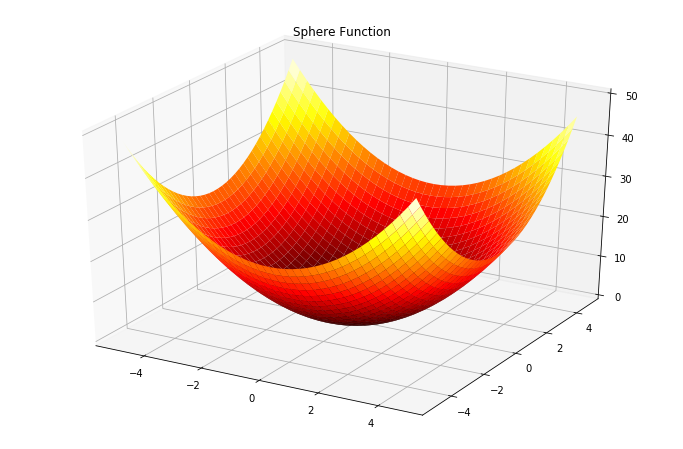

In [8]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

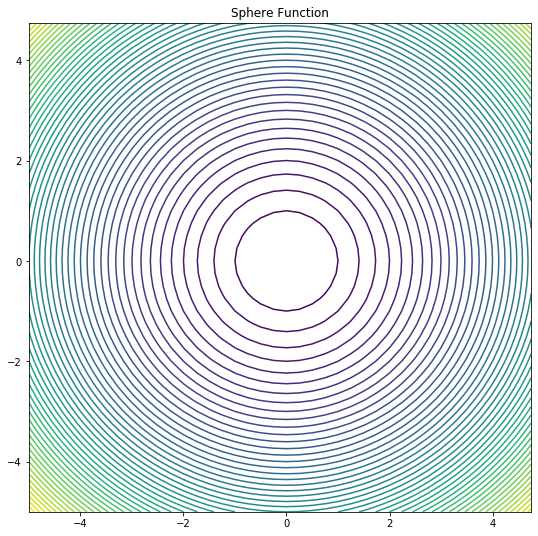

In [9]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

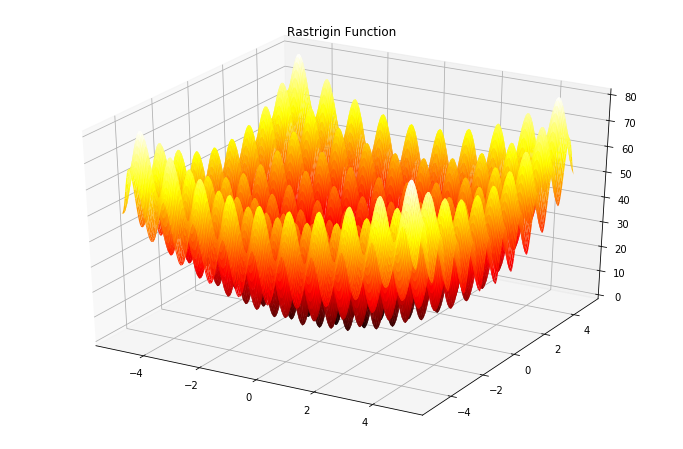

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

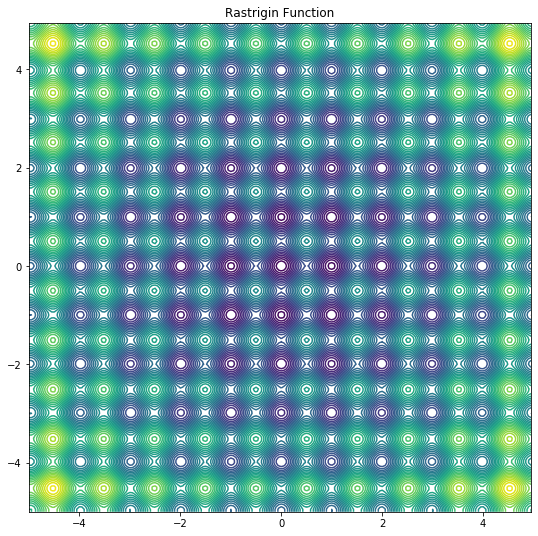

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

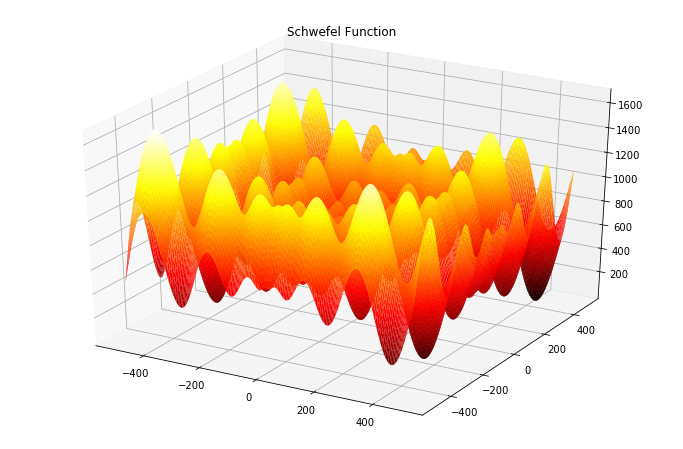

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

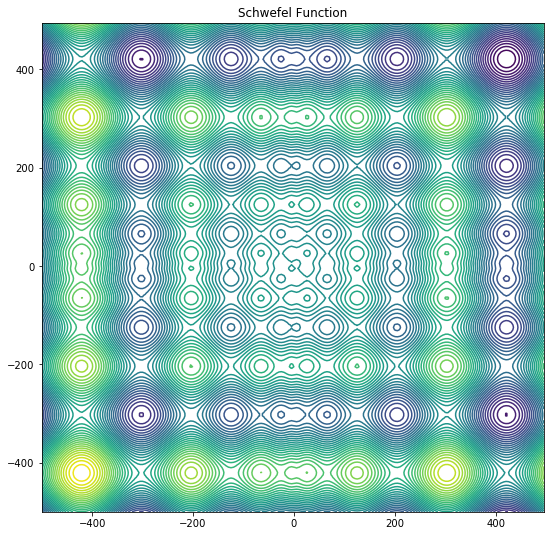

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

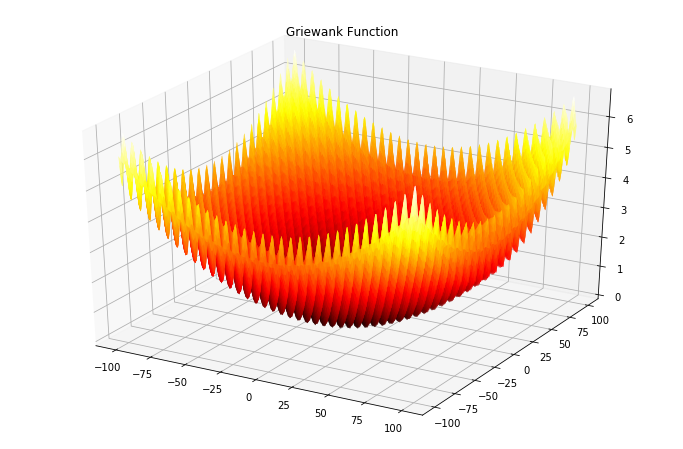

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

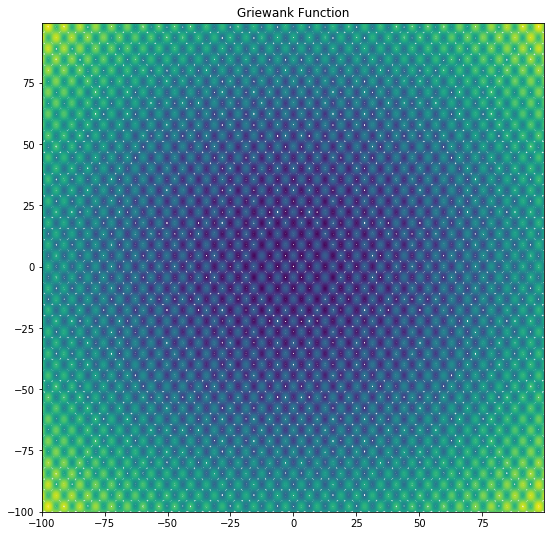

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [35]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [36]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

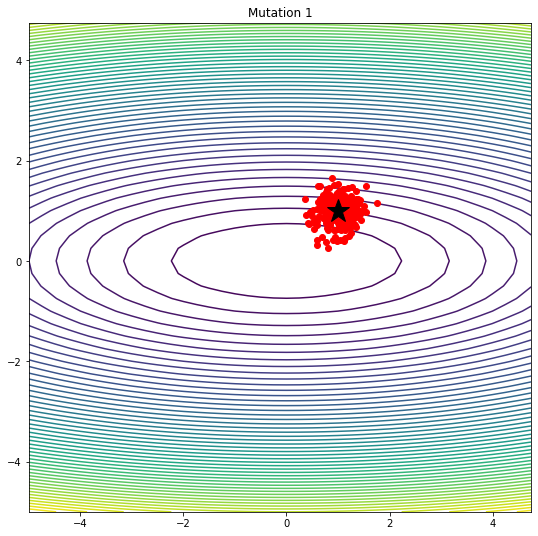

In [37]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [64]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

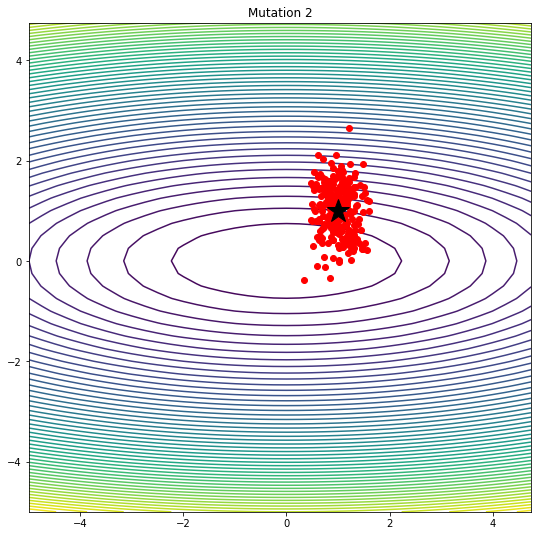

In [65]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [40]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

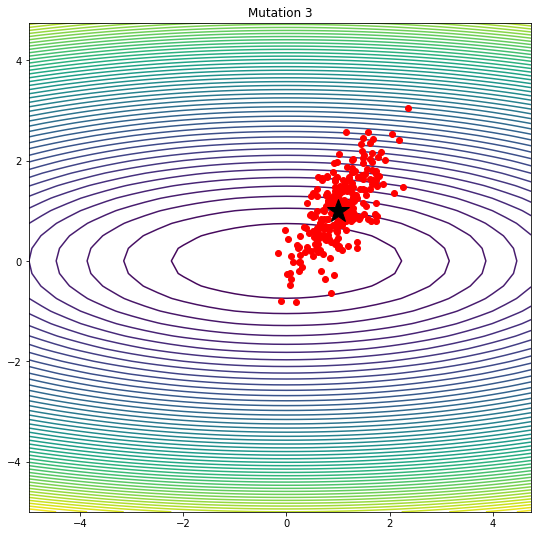

In [41]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [53]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1,low=-10000,high=10000):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        current_population_solutions[current_population_solutions < low] = low
        current_population_solutions[current_population_solutions > high] = high
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

#         if np.mod(t, log_frequency) == 0:
#             print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -6280.15161212, mean score = -26285.94889546.
Iteration 0010 : best score = -28.79821968, mean score = -193.82407404.
Iteration 0020 : best score = -0.07837981, mean score = -0.47151071.
Iteration 0030 : best score = -0.00011309, mean score = -0.00089949.
Iteration 0040 : best score = -0.00000019, mean score = -0.00000173.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


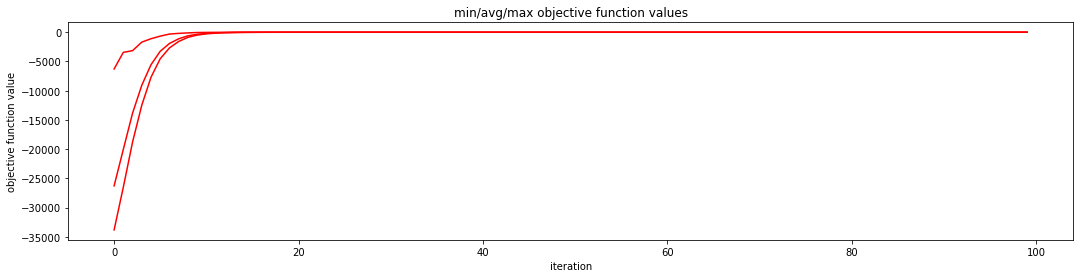

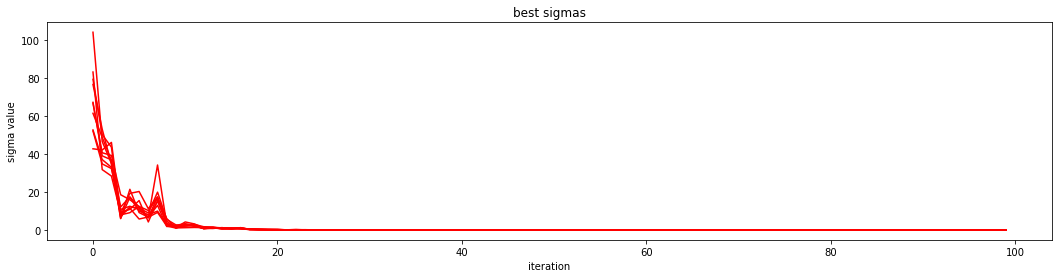

In [43]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

Iteration 0000 : best score = -5124.44004369, mean score = -26496.84401022.
Iteration 0010 : best score = -114.10374648, mean score = -320.13916047.
Iteration 0020 : best score = -32.78113846, mean score = -76.53760094.
Iteration 0030 : best score = -16.54205949, mean score = -62.11631131.
Iteration 0040 : best score = -16.54205949, mean score = -55.55525808.
Iteration 0050 : best score = -16.54205949, mean score = -51.23864857.
Iteration 0060 : best score = -1.16525829, mean score = -8.11911277.
Iteration 0070 : best score = -0.00302409, mean score = -0.01873647.
Iteration 0080 : best score = -0.00000360, mean score = -0.00003453.
Iteration 0090 : best score = -0.00000001, mean score = -0.00000005.


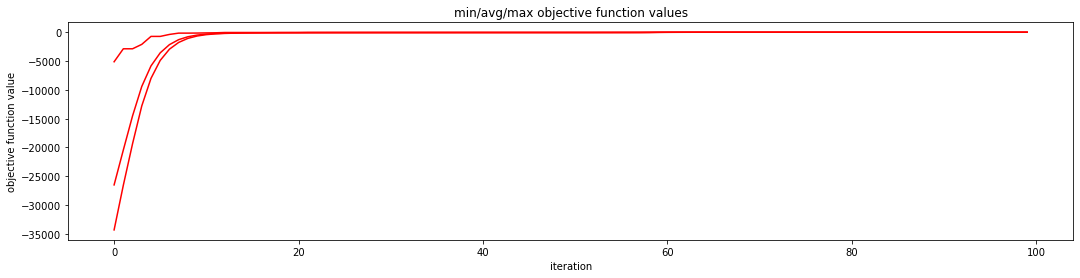

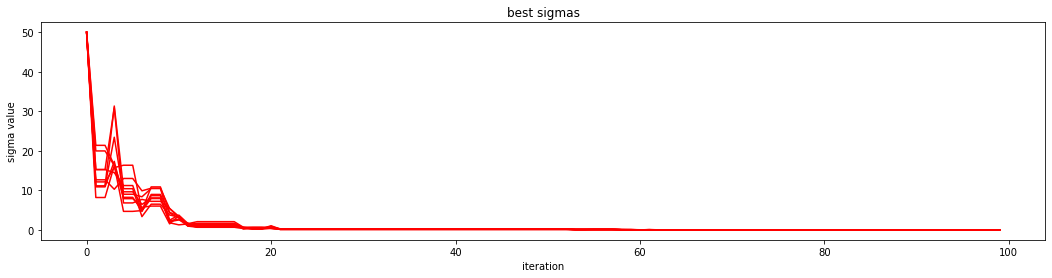

In [44]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -2.50365888, mean score = -7.54045167.
Iteration 0010 : best score = -0.36953842, mean score = -1.04886841.
Iteration 0020 : best score = -0.04132080, mean score = -0.30685282.
Iteration 0030 : best score = -0.00015075, mean score = -0.00093018.
Iteration 0040 : best score = -0.00000086, mean score = -0.00000450.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000003.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


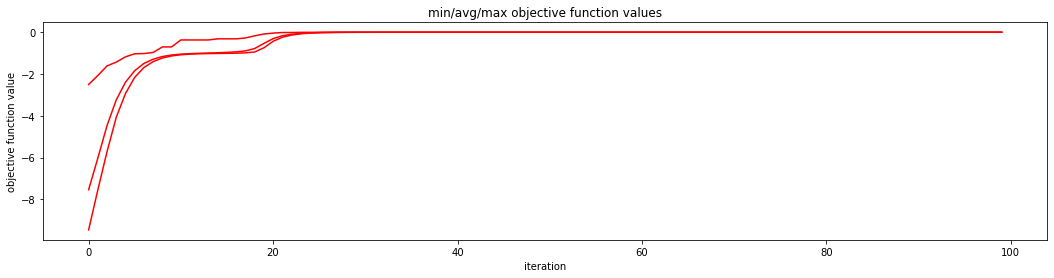

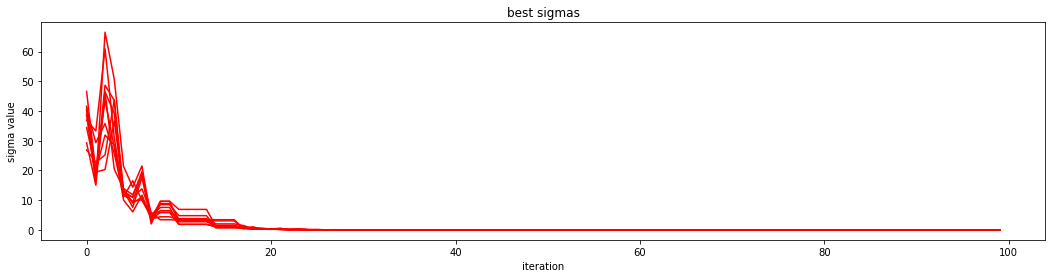

In [45]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### zad1

In [50]:
instances = [
    'Sphere function:',(objective_function_F1, 10, 1000, 100, 2000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 101),
    (objective_function_F1, 20, 500, 100, 1000, 2, 10.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 101),
    (objective_function_F1, 50, 1000, 100, 2000, 3, 10.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 101),
    (objective_function_F1, 100, 1000, 100, 2000, 2, 10.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 101),
    'Rastrigin function:',(objective_function_F6, 10, 1000, 100, 2000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 101),
    (objective_function_F6, 20, 500, 100, 1000, 2, 10.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 101),
    (objective_function_F6, 50, 1000, 100, 2000, 3, 10.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 101),
    (objective_function_F6, 100, 1000, 100, 2000, 2, 10.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 101),
    'Schwefel function:',(objective_function_F7, 10, 1000, 100, 2000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 101,-500,500),
    (objective_function_F7, 20, 500, 100, 1000, 2, 10.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 101,-500,500),
    (objective_function_F7, 50, 1000, 100, 2000, 3, 10.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 101,-500,500),
    (objective_function_F7, 100, 1000, 100, 2000, 2, 10.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 101,-500,500),
    'Griewank function:',(objective_function_F8, 10, 1000, 100, 2000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 101),
    (objective_function_F8, 20, 500, 100, 1000, 2, 10.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 101),
    (objective_function_F8, 50, 1000, 100, 2000, 3, 10.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 101),
    (objective_function_F8, 100, 1000, 100, 2000, 2, 10.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 101),
]

Sphere function:


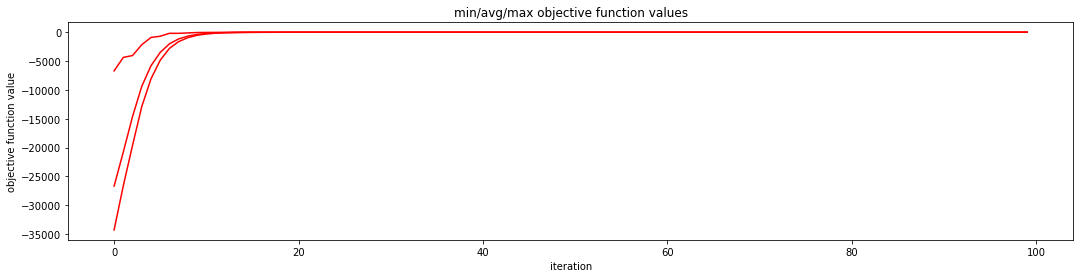

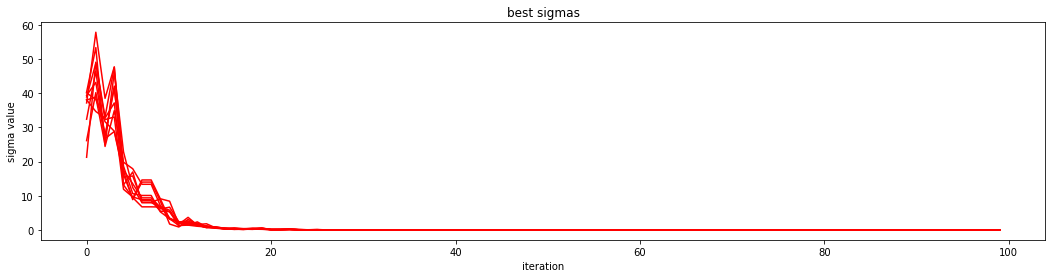

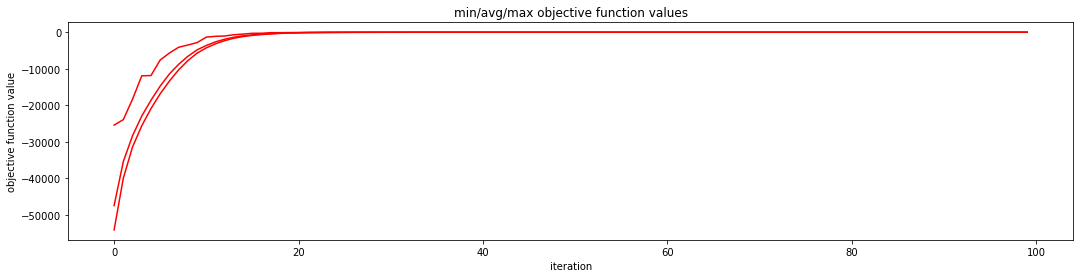

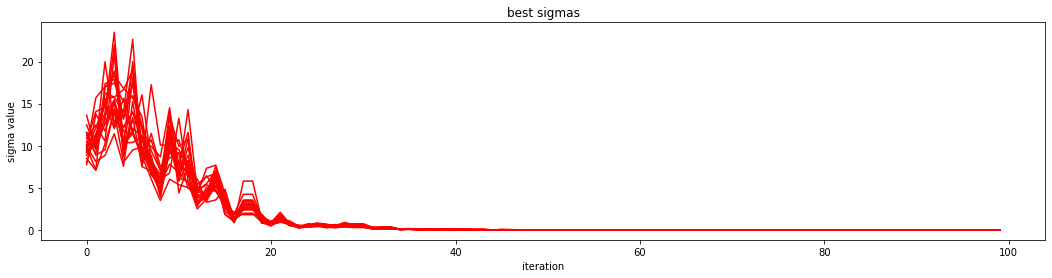

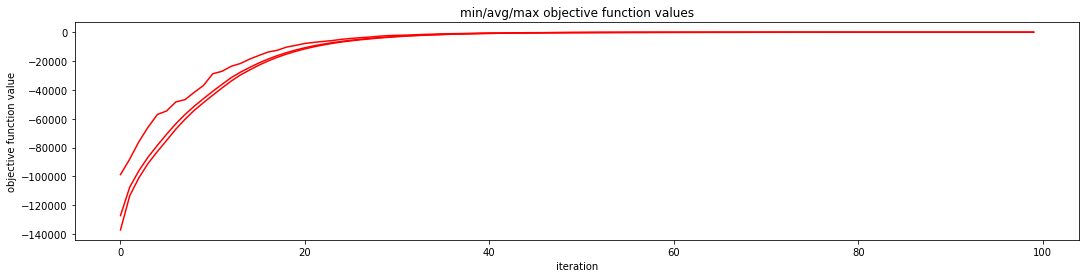

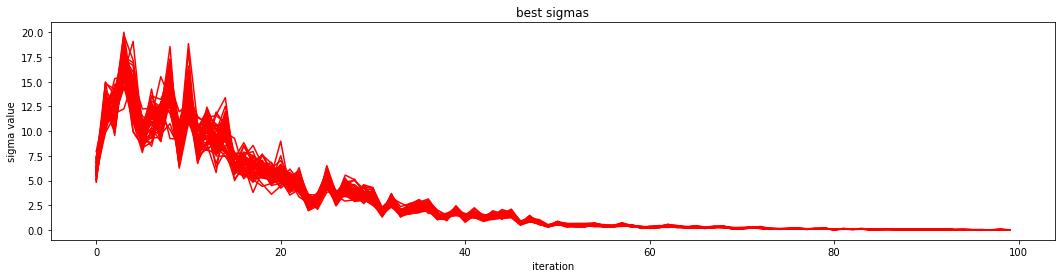

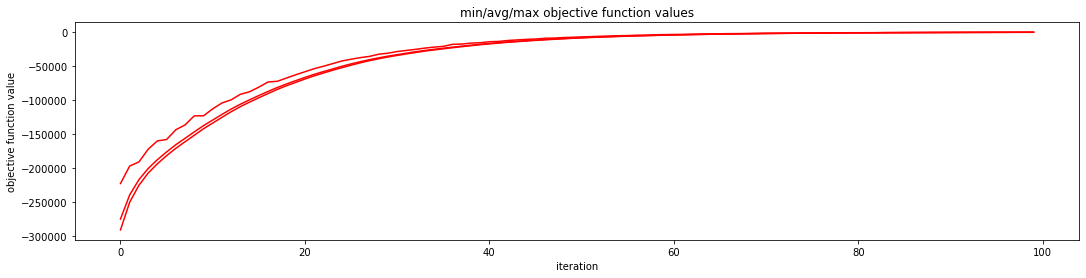

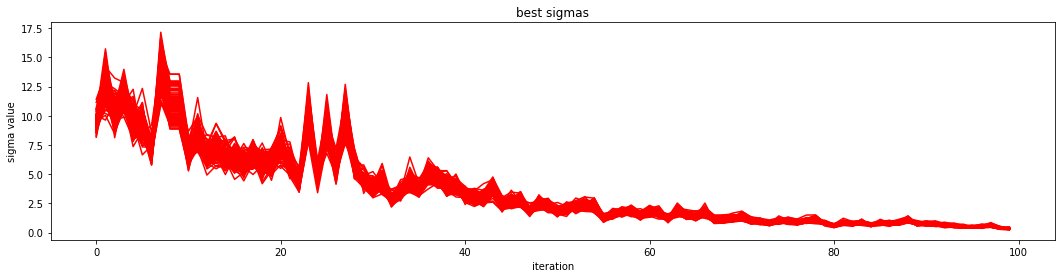

Rastrigin function:


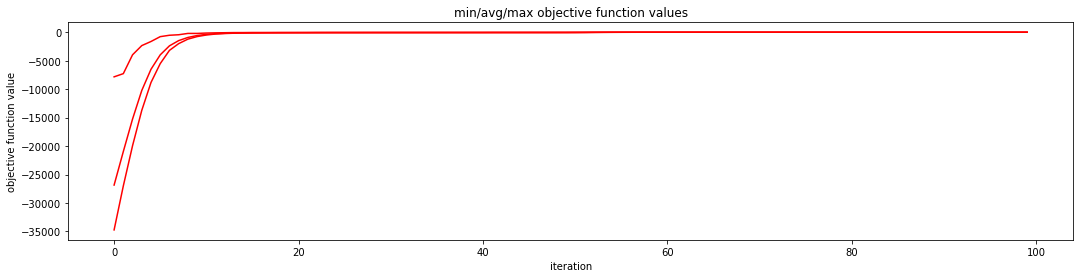

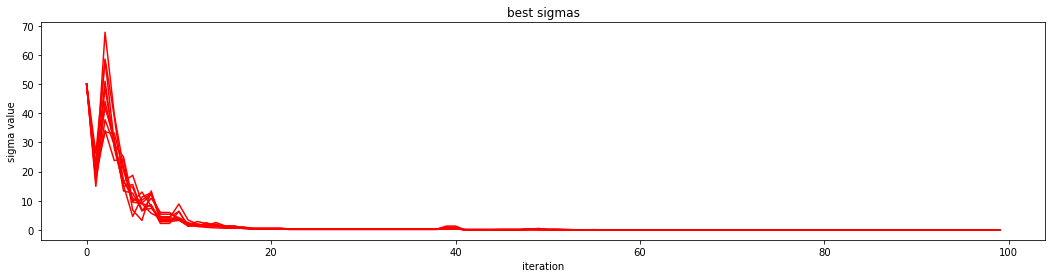

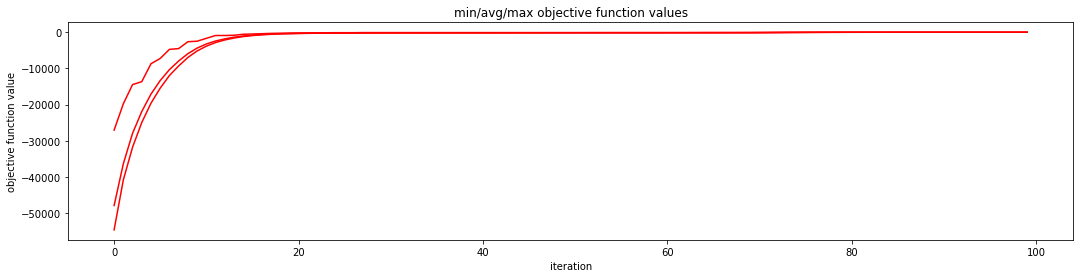

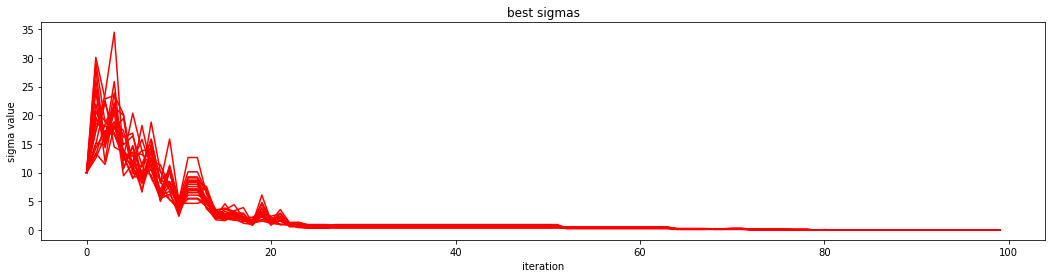

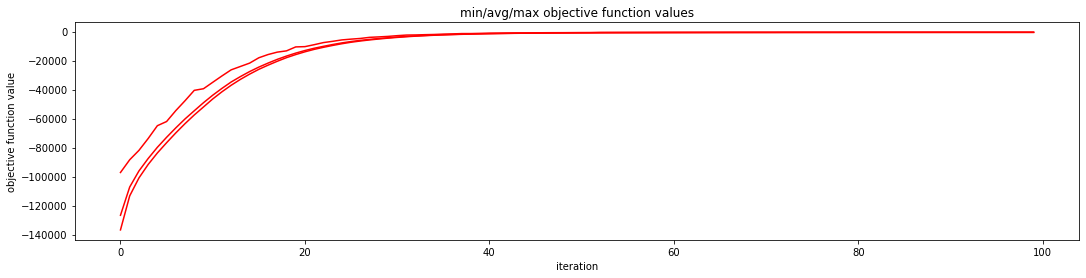

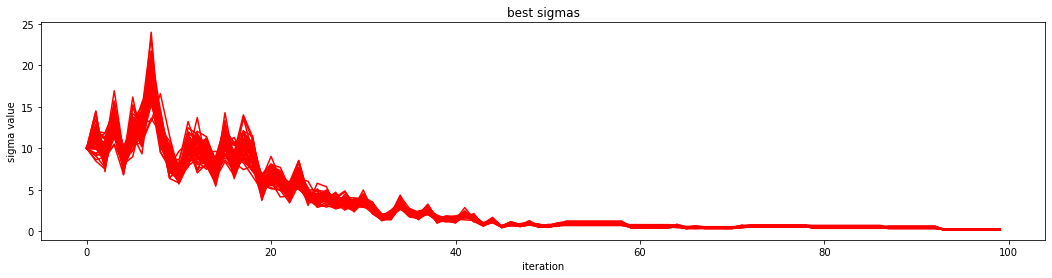

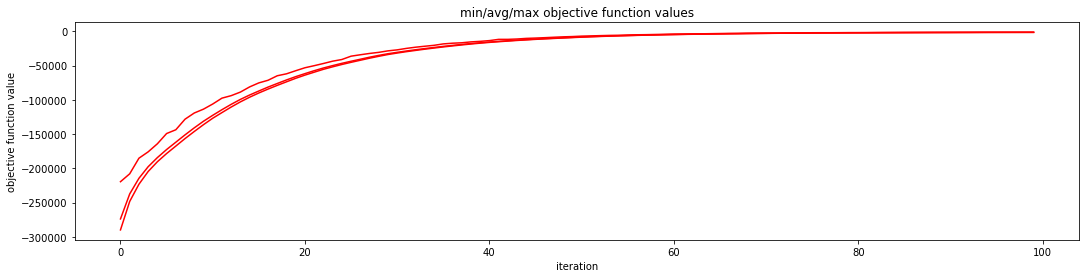

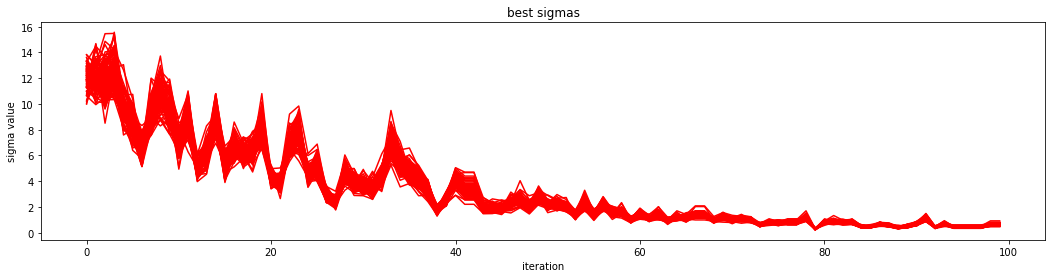

Schwefel function:


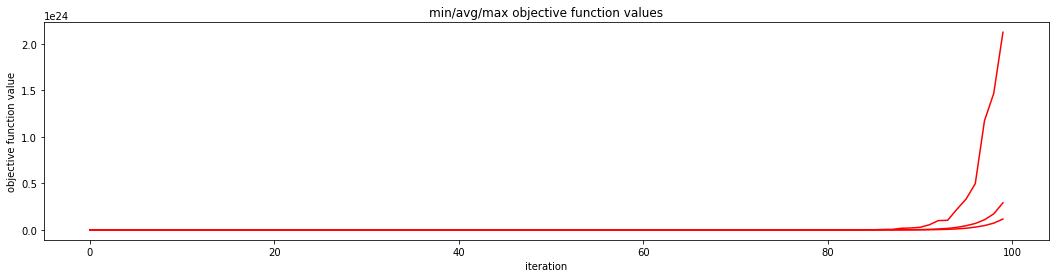

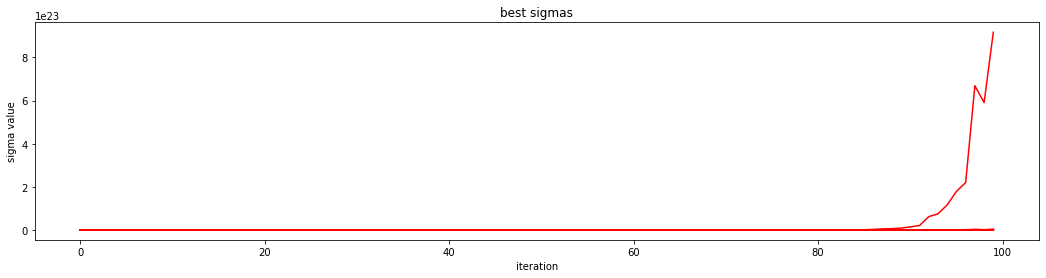

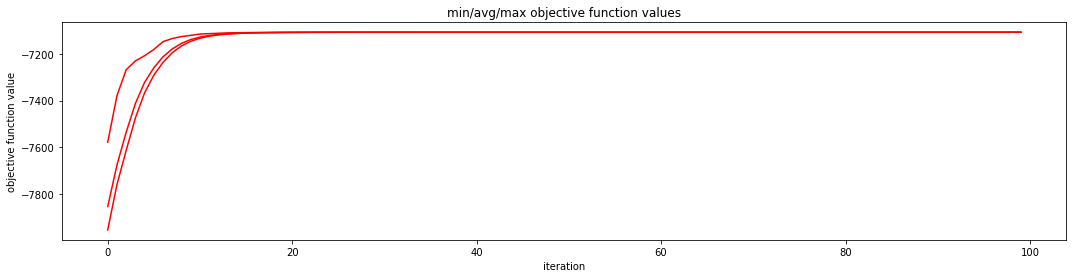

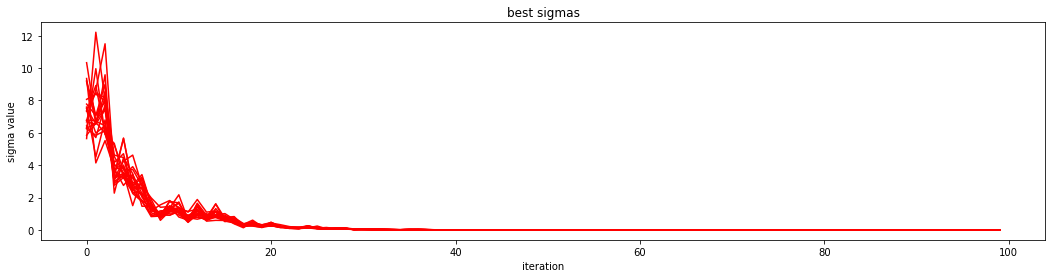

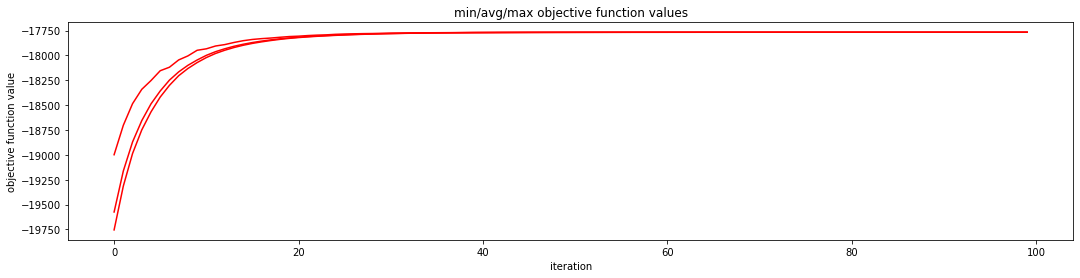

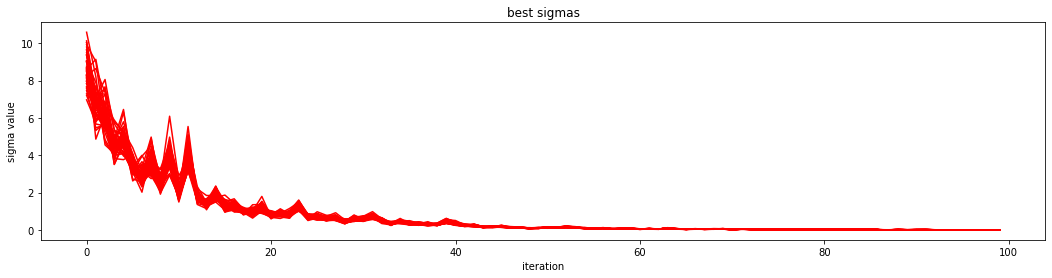

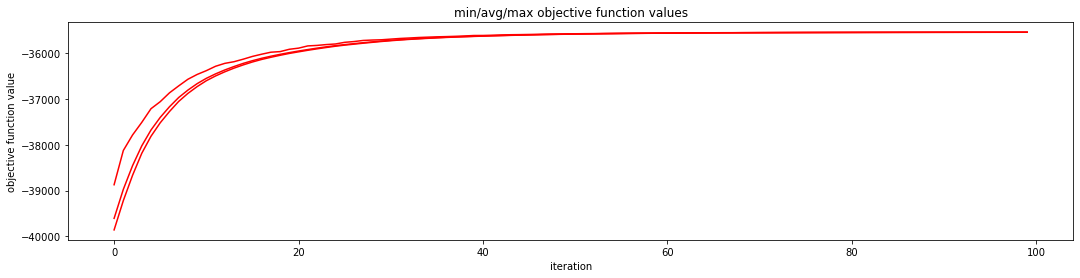

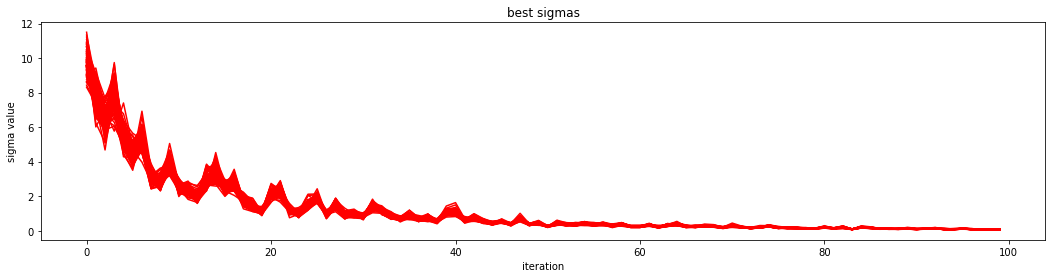

Griewank function:


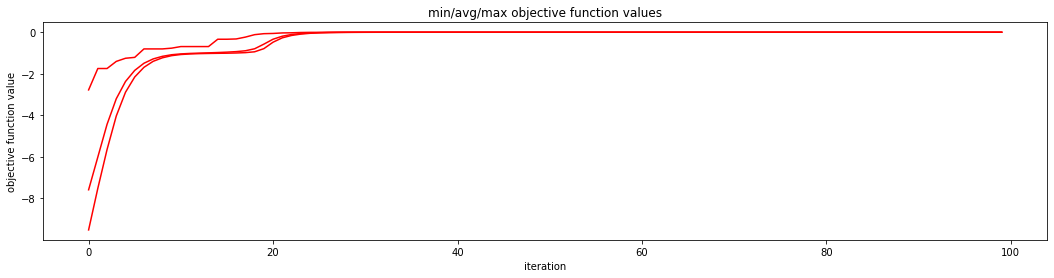

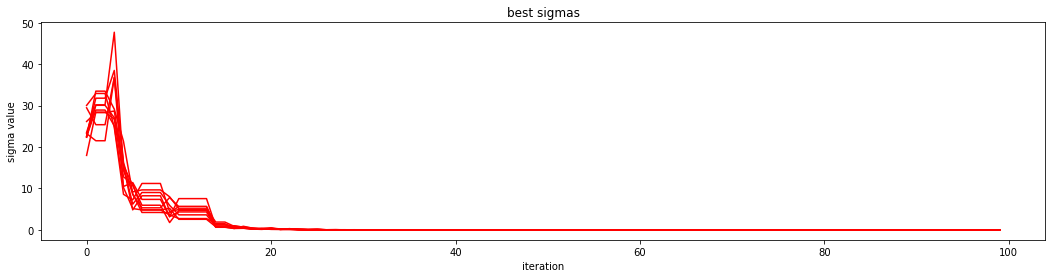

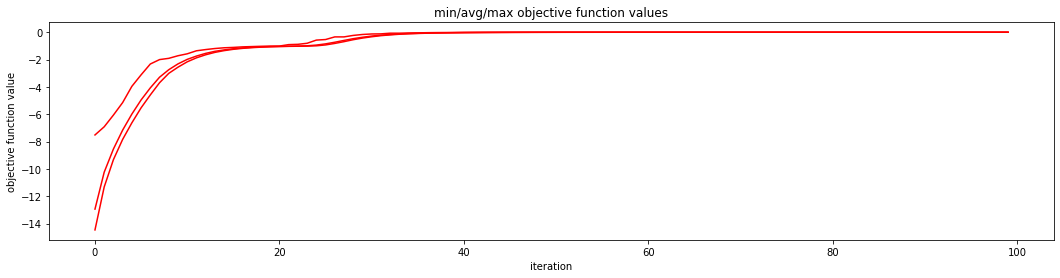

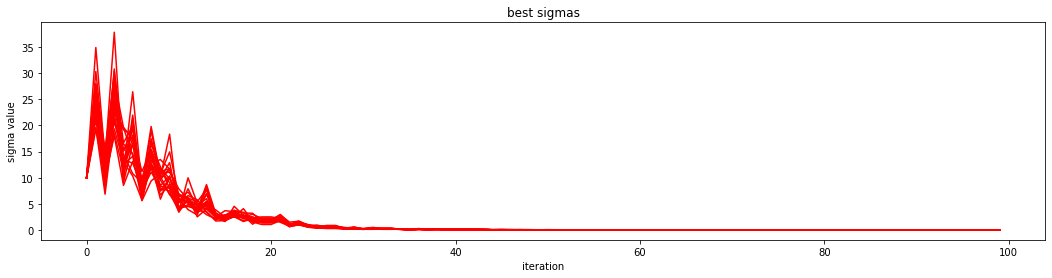

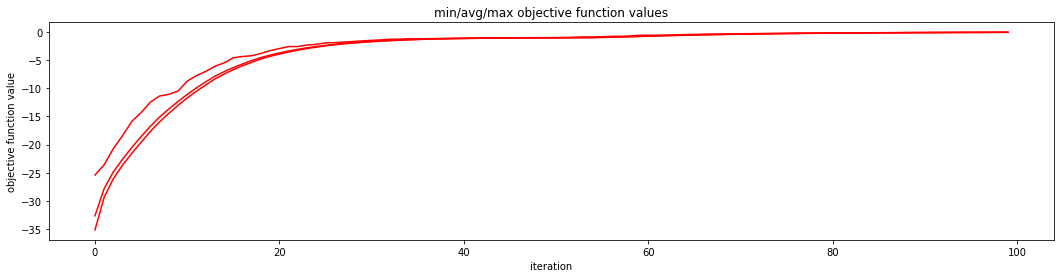

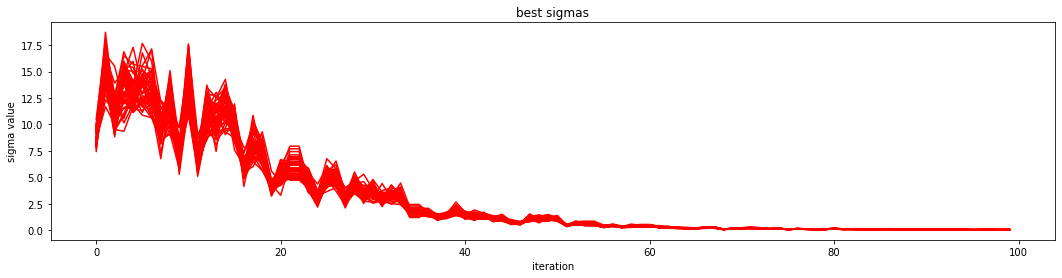

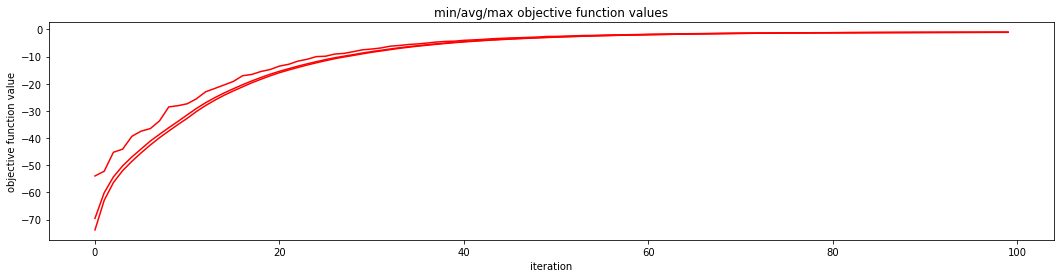

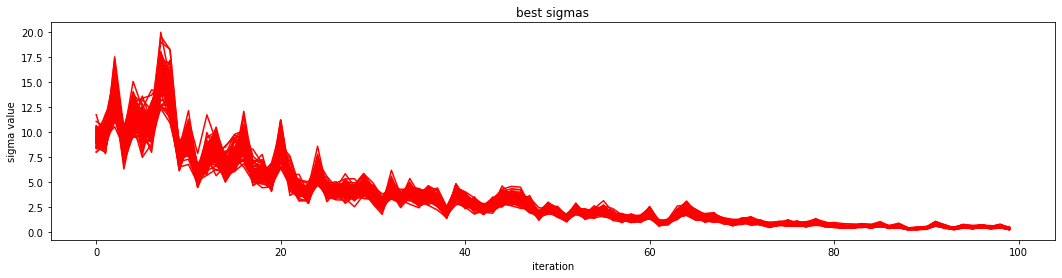

In [54]:
for i in instances:
    if type(i) != str:
        if i[0] == objective_function_F7:
            best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8],i[9],i[10],i[11])            
        else:
            best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8],i[9])
        plt.figure(figsize=(18, 4))
        plt.plot(history_objective_values[:, 0], 'r-')
        plt.plot(history_objective_values[:, 1], 'r-')
        plt.plot(history_objective_values[:, 2], 'r-')
        plt.xlabel('iteration')
        plt.ylabel('objective function value')
        plt.title('min/avg/max objective function values')
        plt.show()

        plt.figure(figsize=(18, 4))
        plt.plot(history_best_sigmas, 'r-')
        plt.xlabel('iteration')
        plt.ylabel('sigma value')
        plt.title('best sigmas')
        plt.show()
    else:
        print(i)

### zad2

In [26]:
N = 250
d = 2
obj_f = objective_function_F1
original_individual = np.array([[1, 1]])

In [17]:
def mutation1(x, sigma):
    return x + sigma * np.random.randn(N, d)

In [19]:
def mutation2(x, sigma):
    return x + sigma * np.random.randn(N, d)

In [20]:
def mutation3(x, sigma):
    return x + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

In [43]:
mutations_f = {'mutation1': (mutation1,0.25), 'mutation2': (mutation2,np.array([0.25, 0.5])), 'mutation3': (mutation3,np.array([[0.25, 0.25],[0.25, 0.5]]))}

In [44]:
functions = {'sphere': objective_function_F1, 'Rastrigin': objective_function_F6, 'Schwefel': objective_function_F7, 'Griewank': objective_function_F8}

In [47]:
for kf,vf in functions.items():
    obj_f = vf
    print(kf,' function')
    for k,v in mutations_f.items():
        m_f, sigma = v
        mutations = m_f(original_individual, sigma)
        avg, best_avg = 0,0
        for i in range(100):
            avg += np.sum(obj_f(mutations) < obj_f(original_individual))
            best_avg +=  np.max(obj_f(mutations))
        best_avg /= 100
        avg /= 100

        print('100 iterations avg better: {}, avg max: {}'.format(avg, best_avg))
    
    

sphere  function
100 iterations avg better: 130.0, avg max: -0.30819971894697756
100 iterations avg better: 126.0, avg max: -0.36181105350808385
100 iterations avg better: 127.0, avg max: -0.0047730870545819185
Rastrigin  function
100 iterations avg better: 250.0, avg max: -2.097349493212448
100 iterations avg better: 249.0, avg max: -1.6817365276789076
100 iterations avg better: 247.0, avg max: -0.06751757563381844
Schwefel  function
100 iterations avg better: 122.0, avg max: -835.15421964738
100 iterations avg better: 107.0, avg max: -834.4516080252798
100 iterations avg better: 126.0, avg max: -833.3692855787433
Griewank  function
100 iterations avg better: 143.0, avg max: -0.22883039257967874
100 iterations avg better: 149.0, avg max: -0.14453392766808368
100 iterations avg better: 121.0, avg max: -0.00216806479784748


In [94]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)
    print('radius x: {}  radius y: {}'.format(ell_radius_x * 2, ell_radius_y * 2))
    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

radius x: 1.9589570278889317  radius y: 2.040217479310616


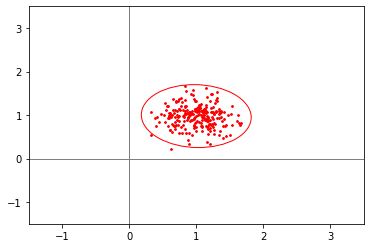

radius x: 1.9622525864645324  radius y: 2.0370480570946903


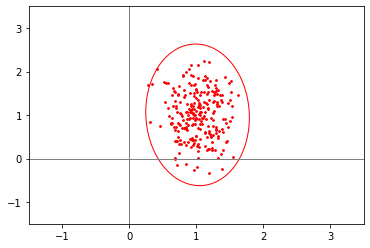

radius x: 2.6578719444541736  radius y: 0.9673245199432242


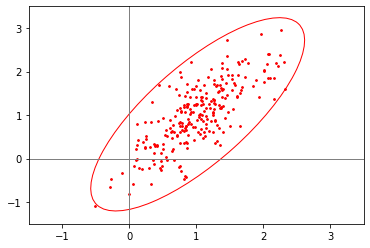

In [95]:
for k,v in mutations_f.items():
    m_f, sigma = v
    mutations = m_f(original_individual,sigma)
    fig, ax = plt.subplots()
    x, y = mutations[:,0], mutations[:,1]
    ax.scatter(x, y, s=0.5)
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)
    confidence_ellipse(x, y, ax, edgecolor='red')
    ax.scatter(x, y, c='red', s=3)
    plt.xlim(-1.5,3.5)
    plt.ylim(-1.5,3.5)
    plt.show()